In [57]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [58]:
mdata = sm.datasets.macrodata.load_pandas().data
mdata

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [59]:
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates['year'] + 'Q' + dates['quarter']


In [60]:
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)
dates

,year,quarter
0,1959,1
1,1959,2
2,1959,3
3,1959,4
4,1960,1
...,...,...
198,2008,3
199,2008,4
200,2009,1
201,2009,2


<Axes: >

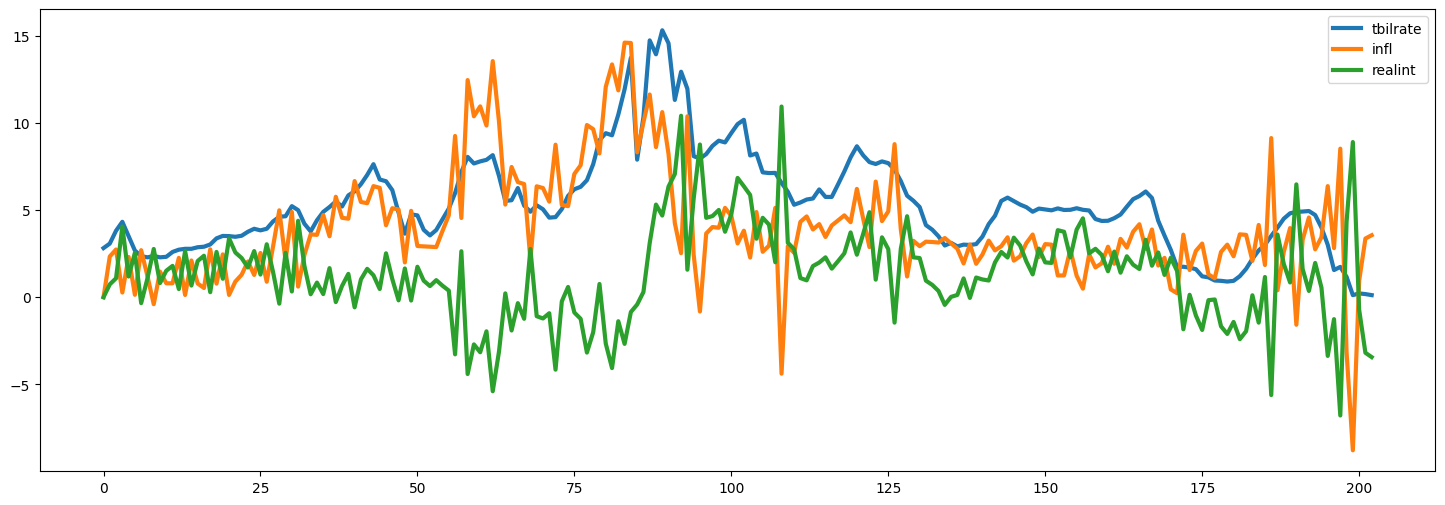

In [61]:
mdata[['tbilrate', 'infl', 'realint']].plot(figsize=(18,6), linewidth=3)

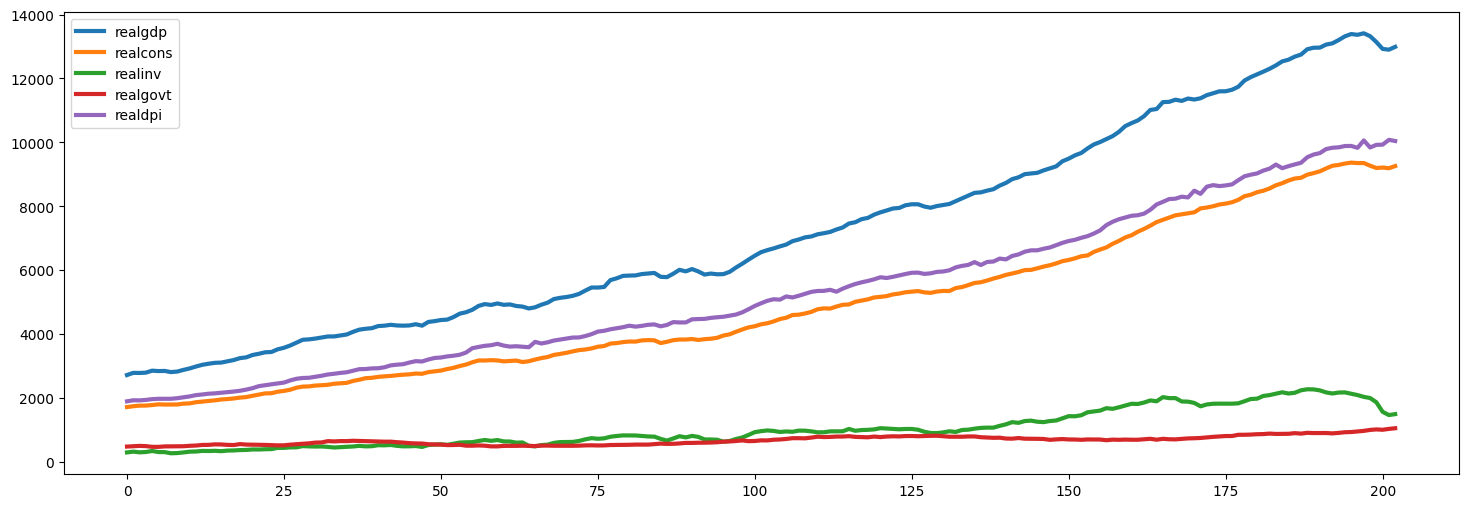

In [62]:
import matplotlib.pyplot as plt
mdata[['realgdp', 'realcons', 'realinv', 'realgovt', 'realdpi']].plot(figsize=(18,6), linewidth=3)
plt.show()

In [63]:
mdata = mdata[['realgdp', 'realcons', 'realinv']]
mdata.index = pd.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()
data

,realgdp,realcons,realinv
1959-06-30,0.024942,0.015286,0.080213
1959-09-30,-0.001193,0.010386,-0.072131
1959-12-31,0.003495,0.001084,0.034425
1960-03-31,0.022190,0.009534,0.102664
1960-06-30,-0.004685,0.012572,-0.106694
...,...,...,...
2008-09-30,-0.006781,-0.008948,-0.017836
2008-12-31,-0.013805,-0.007843,-0.069165
2009-03-31,-0.016612,0.001511,-0.175598
2009-06-30,-0.001851,-0.002196,-0.067561


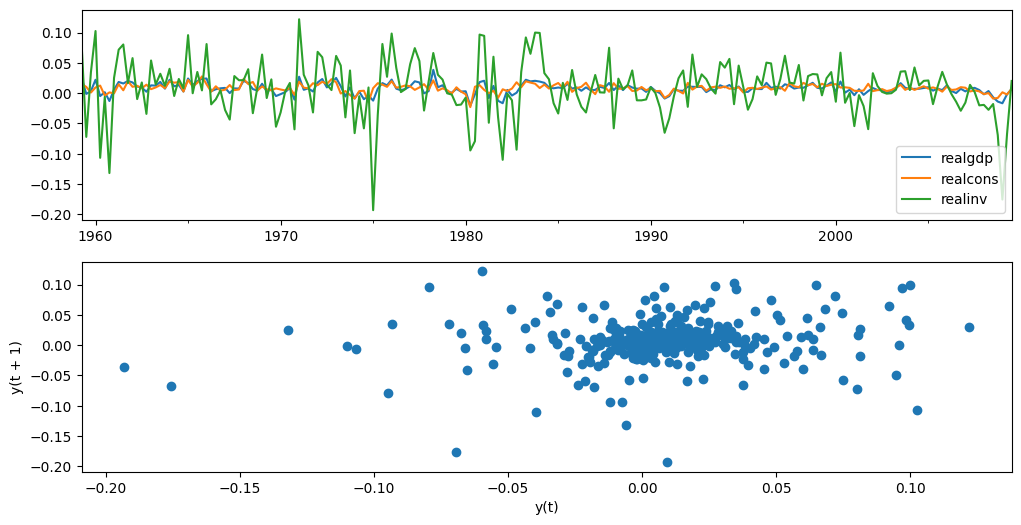

In [64]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
data.plot(ax=ax1)
pd.plotting.lag_plot(data)
plt.show()

In [65]:
data.head(2)

,realgdp,realcons,realinv
1959-06-30,0.024942,0.015286,0.080213
1959-09-30,-0.001193,0.010386,-0.072131


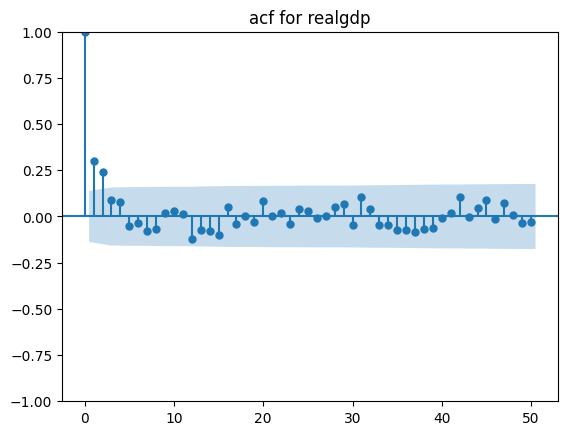

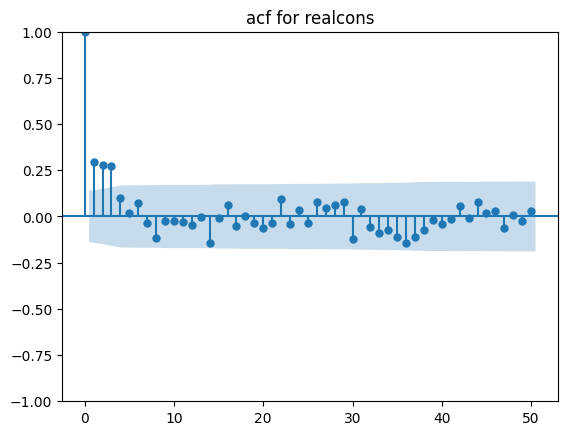

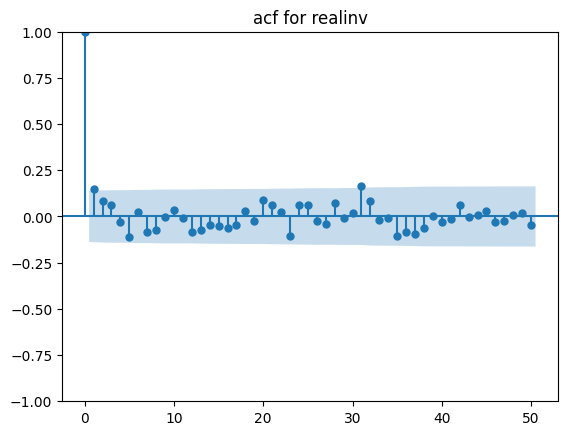

In [66]:
from statsmodels.graphics.tsaplots import plot_acf
for i in data:
    plot_acf(data[i], lags=50)
    plt.title(f"acf for {i}")
    plt.show()

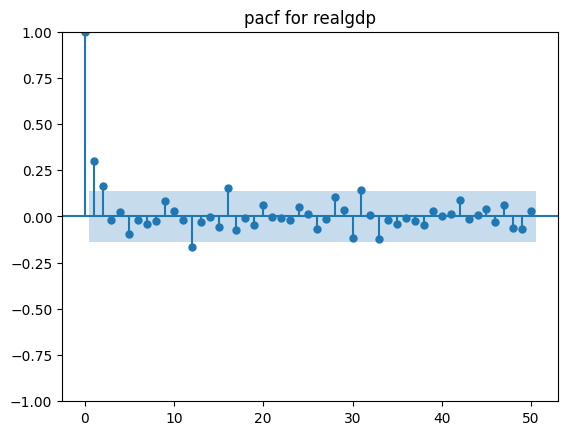

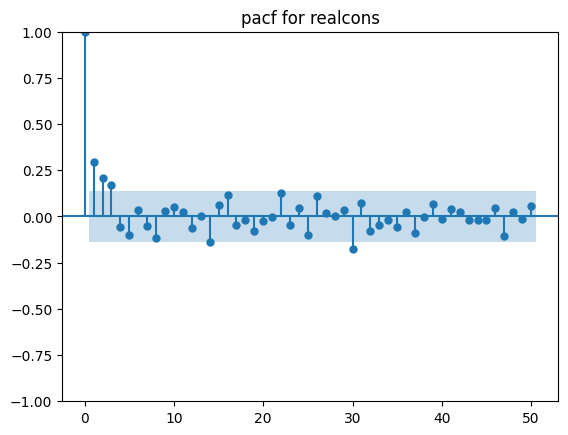

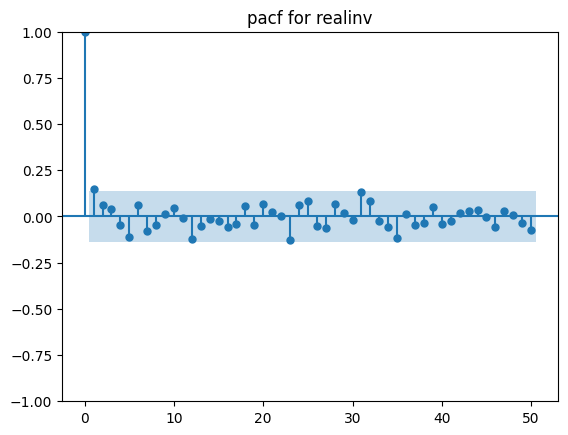

In [67]:
from statsmodels.graphics.tsaplots import plot_pacf
for i in data:
    plot_pacf(data[i], lags=50)
    plt.title(f"pacf for {i}")
    plt.show()

In [68]:
from statsmodels.tsa.stattools import adfuller
def adf(time_series):
    result = adfuller(time_series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

for i in data:
    print(f'-Test statistic for {i}')
    adf(data[i])

-Test statistic for realgdp
ADF Statistic: -6.972871
p-value: 0.000000
-Test statistic for realcons
ADF Statistic: -4.991971
p-value: 0.000023
-Test statistic for realinv
ADF Statistic: -12.218963
p-value: 0.000000


In [69]:
obs = 5
X_train, X_test = data[0:-obs], data[-obs:]

print(X_train.shape)
print(X_test.shape)

(197, 3)
(5, 3)


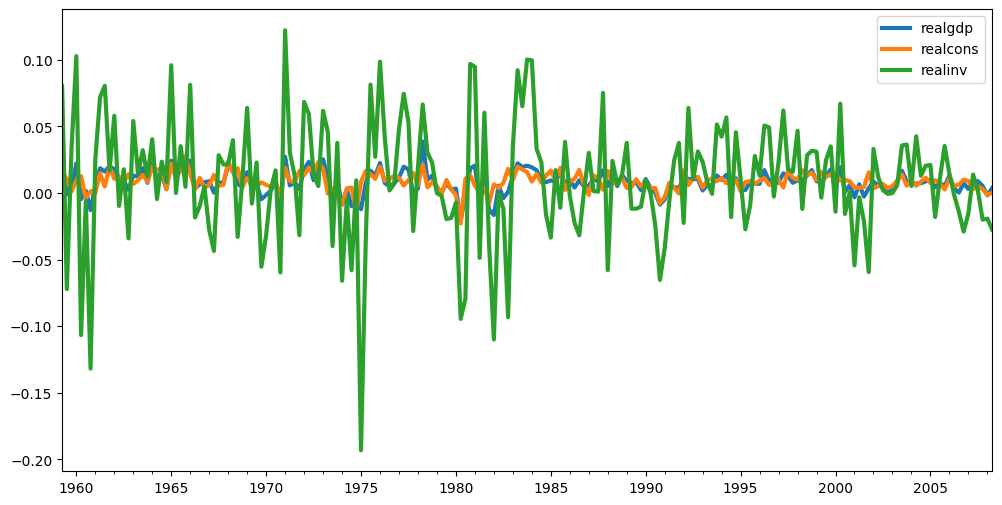

In [70]:
X_train.plot(figsize=(12,6), linewidth=3)
plt.show()

In [71]:
model_var = VAR(endog=X_train)
res = model_var.select_order(maxlags=6)
res.summary()

c:\git_files\AI_TimeSeries\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-27.82,-27.77,8.281e-13,-27.80
1,-28.10*,-27.89*,6.277e-13*,-28.01*
2,-28.07,-27.71,6.449e-13,-27.93
3,-28.07,-27.55,6.476e-13,-27.86
4,-28.07,-27.41,6.439e-13,-27.80
5,-28.05,-27.24,6.554e-13,-27.72
6,-28.01,-27.04,6.826e-13,-27.62


In [72]:
model_fit = model_var.fit(maxlags=3, ic='aic')
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 21, Nov, 2025
Time:                     15:38:07
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.8137
Nobs:                     196.000    HQIC:                  -27.9331
Log likelihood:           1923.07    FPE:                6.81589e-13
AIC:                     -28.0144    Det(Omega_mle):     6.41506e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.004187         0.000937            4.470           0.000
L1.realgdp         -0.357764         0.174314           -2.052           0.040
L1.realcons         0.711044         0.133371            5.331    

In [73]:
lag_order = model_fit.k_ar
print(lag_order)

1


In [74]:
model_fit.forecast(X_train.values[-lag_order:], steps=5)

array([[ 0.00140148,  0.00531336, -0.02966532],
       [ 0.00573479,  0.00691368, -0.00123542],
       [ 0.00697939,  0.00794494,  0.00403378],
       [ 0.0075745 ,  0.0082942 ,  0.00725638],
       [ 0.00779776,  0.0084469 ,  0.00835919]])

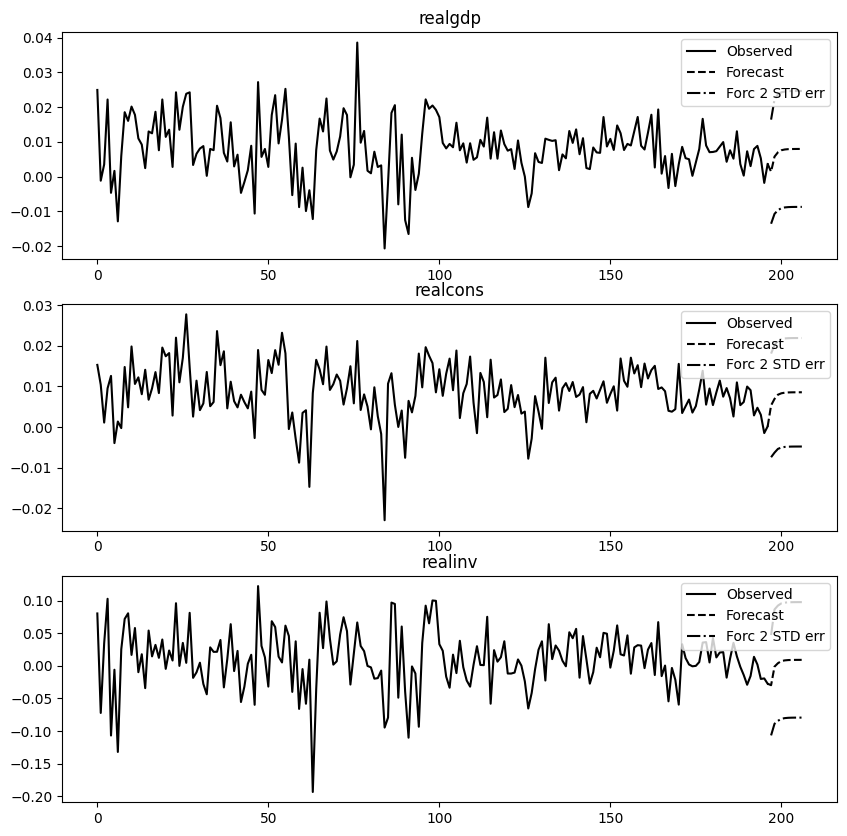

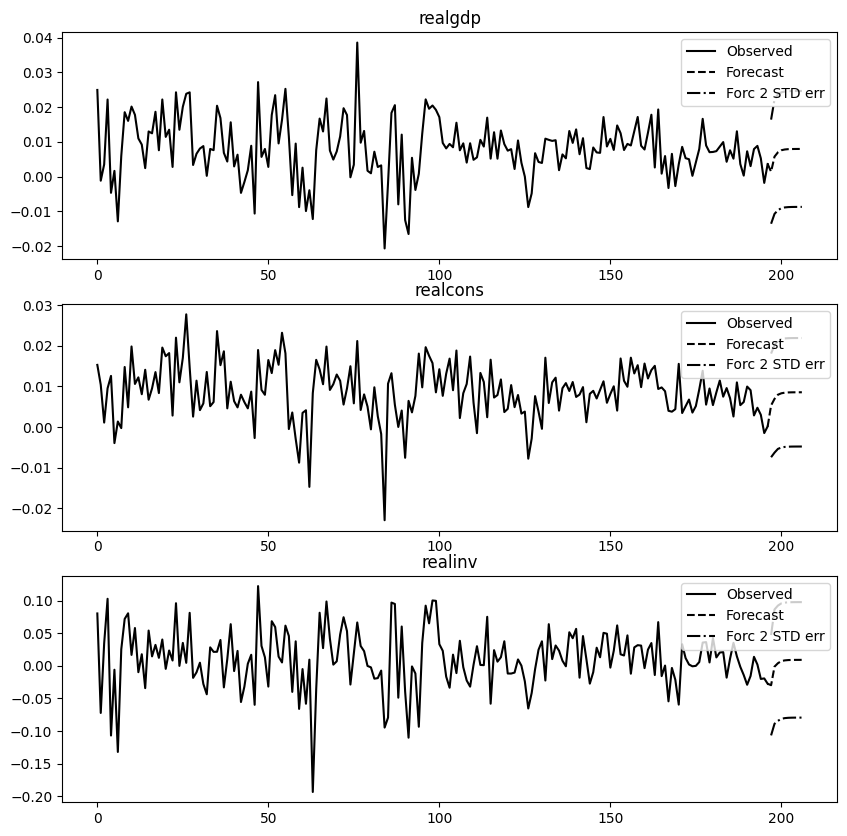

In [75]:
model_fit.plot_forecast(10)

In [76]:
pred = model_fit.forecast(X_train.values[-lag_order:], steps=obs)
pred = pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred')
pred

,realgdp_pred,realcons_pred,realinv_pred
2008-09-30,0.001401,0.005313,-0.029665
2008-12-31,0.005735,0.006914,-0.001235
2009-03-31,0.006979,0.007945,0.004034
2009-06-30,0.007575,0.008294,0.007256
2009-09-30,0.007798,0.008447,0.008359


In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [78]:
# Evaluate forecast bias
forecast_errors = [X_test['realgdp'][i] - pred['realgdp_pred'][i] for i in range(len(X_test['realgdp']))]
bias = sum(forecast_errors) * 1.0/ len(X_test['realgdp'])
print(f'Bias: {bias:.6f}')

# Evaluate mean absolute error
mae = mean_absolute_error(X_test['realgdp'], pred['realgdp_pred'])
print(f"MAE: {mae:.6f}")

# Evaluate mean squared error and root mean squared error
mse = mean_squared_error(X_test['realgdp'], pred['realgdp_pred'])
print(f"MSE: {mse:.6f}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.6f}")

Bias: -0.012335
MAE: 0.012335
MSE: 0.000219
RMSE: 0.014799


C:\Users\User\AppData\Local\Temp\ipykernel_15884\3090832215.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_errors = [X_test['realgdp'][i] - pred['realgdp_pred'][i] for i in range(len(X_test['realgdp']))]


In [79]:
# VECM

In [80]:
from statsmodels.tsa.vector_ar import vecm

In [81]:
vec_rank = vecm.select_coint_rank(X_train, det_order = 1, k_ar_diff = 1, method='trace', signif=0.01)
print(vec_rank.summary())

Johansen cointegration test using trace test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   3          221.1          41.08
  1   3          109.7          23.15
  2   3          39.12          6.635
-------------------------------------


In [82]:
vec_rank = vecm.select_coint_rank(X_train, det_order = 1, k_ar_diff = 1, method='maxeig', signif=0.01)
print(vec_rank.summary())

Johansen cointegration test using maximum eigenvalue test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          111.4          29.26
  1   2          70.58          21.75
  2   3          39.12          6.635
-------------------------------------


In [83]:
vecm = vecm.VECM(endog=X_train, k_ar_diff = 9, coint_rank = 3, deterministic='ci')
vecm_fit = vecm.fit()
vecm_fit.predict(steps=10)

c:\git_files\AI_TimeSeries\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


array([[ 0.00082687,  0.00010849, -0.00520949],
       [-0.00249132, -0.00304268, -0.02092717],
       [-0.00242262, -0.00120947, -0.03049337],
       [-0.00187847,  0.00074454, -0.02943497],
       [-0.00018527,  0.00233478, -0.02139283],
       [ 0.00200132,  0.00645151, -0.01665064],
       [ 0.00712903,  0.00793533,  0.01693045],
       [ 0.00686419,  0.00854292,  0.01681462],
       [ 0.01011226,  0.01106216,  0.02519952],
       [ 0.01133034,  0.01202314,  0.03487855]])

In [84]:
forecast, lower, upper = vecm_fit.predict(10, 0.05)

In [85]:
print(f"Lower Bounds of Confidence Intervals:\n{lower.round(3)}")


Lower Bounds of Confidence Intervals:
[[-0.012 -0.011 -0.068]
 [-0.016 -0.014 -0.089]
 [-0.017 -0.013 -0.1  ]
 [-0.016 -0.011 -0.099]
 [-0.015 -0.01  -0.094]
 [-0.013 -0.006 -0.091]
 [-0.008 -0.005 -0.059]
 [-0.009 -0.004 -0.06 ]
 [-0.006 -0.002 -0.054]
 [-0.005 -0.001 -0.046]]


In [86]:
print(f"\nPoint Forecasts:\n{forecast.round(3)}")



Point Forecasts:
[[ 0.001  0.    -0.005]
 [-0.002 -0.003 -0.021]
 [-0.002 -0.001 -0.03 ]
 [-0.002  0.001 -0.029]
 [-0.     0.002 -0.021]
 [ 0.002  0.006 -0.017]
 [ 0.007  0.008  0.017]
 [ 0.007  0.009  0.017]
 [ 0.01   0.011  0.025]
 [ 0.011  0.012  0.035]]


In [87]:
print(f"\nUpper Bounds of Confidence Intervals:\n{upper.round(3)}")


Upper Bounds of Confidence Intervals:
[[0.014 0.011 0.057]
 [0.011 0.008 0.047]
 [0.012 0.01  0.039]
 [0.013 0.013 0.04 ]
 [0.015 0.015 0.051]
 [0.017 0.019 0.058]
 [0.023 0.021 0.092]
 [0.023 0.021 0.094]
 [0.026 0.024 0.105]
 [0.027 0.025 0.116]]


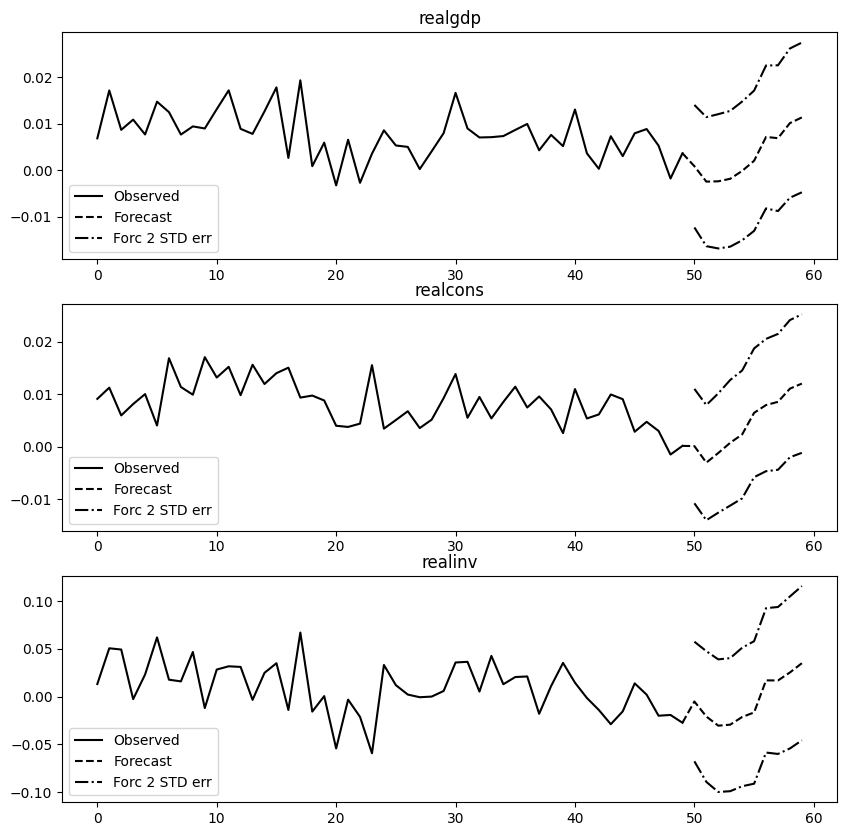

In [88]:
vecm_fit.plot_forecast(steps=10, n_last_obs=50)

In [89]:
# lag order selection

In [91]:
results = model_var.fit(maxlags=15, ic='aic')
model_var.select_order(maxlags=15).summary()

,AIC,BIC,FPE,HQIC
0,-27.84,-27.79,8.079e-13,-27.82
1,-28.11*,-27.90*,6.168e-13*,-28.03*
2,-28.10,-27.73,6.234e-13,-27.95
3,-28.11,-27.58,6.199e-13,-27.90
4,-28.10,-27.41,6.252e-13,-27.82
5,-28.10,-27.25,6.279e-13,-27.76
6,-28.04,-27.03,6.672e-13,-27.63
7,-28.00,-26.83,6.971e-13,-27.52
8,-28.02,-26.70,6.829e-13,-27.48
9,-28.02,-26.54,6.825e-13,-27.42


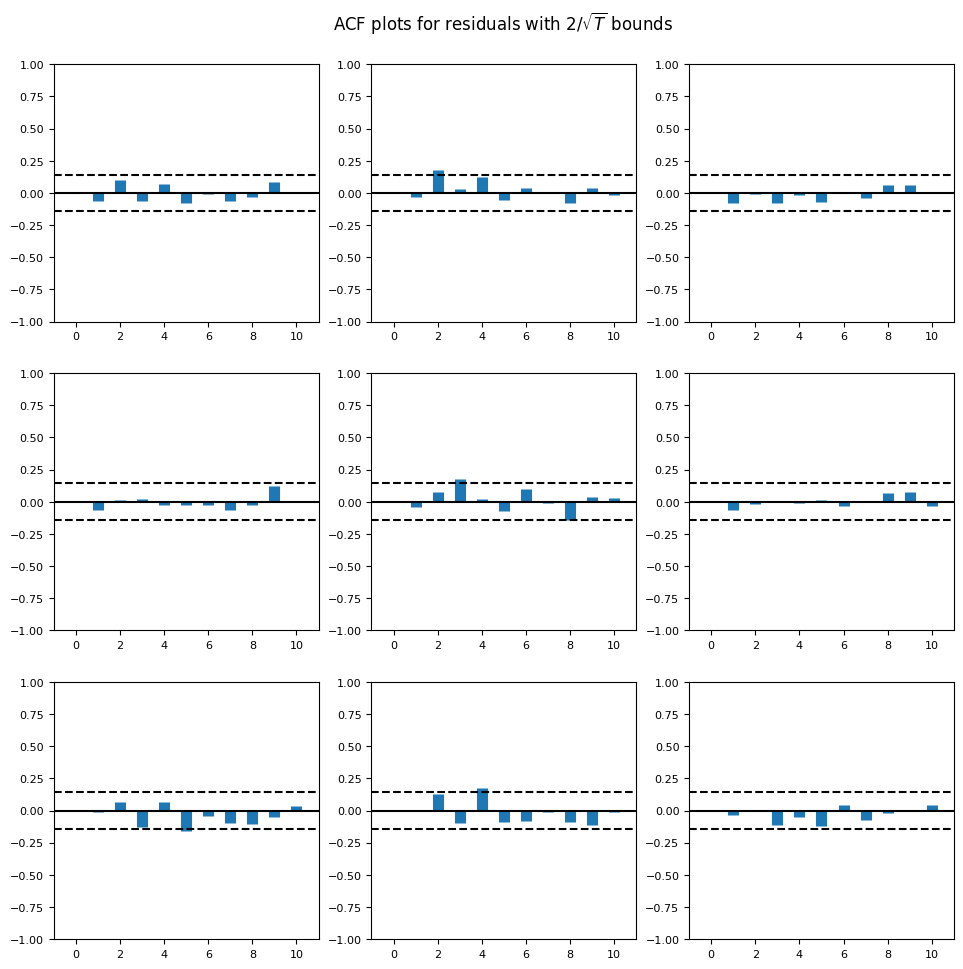

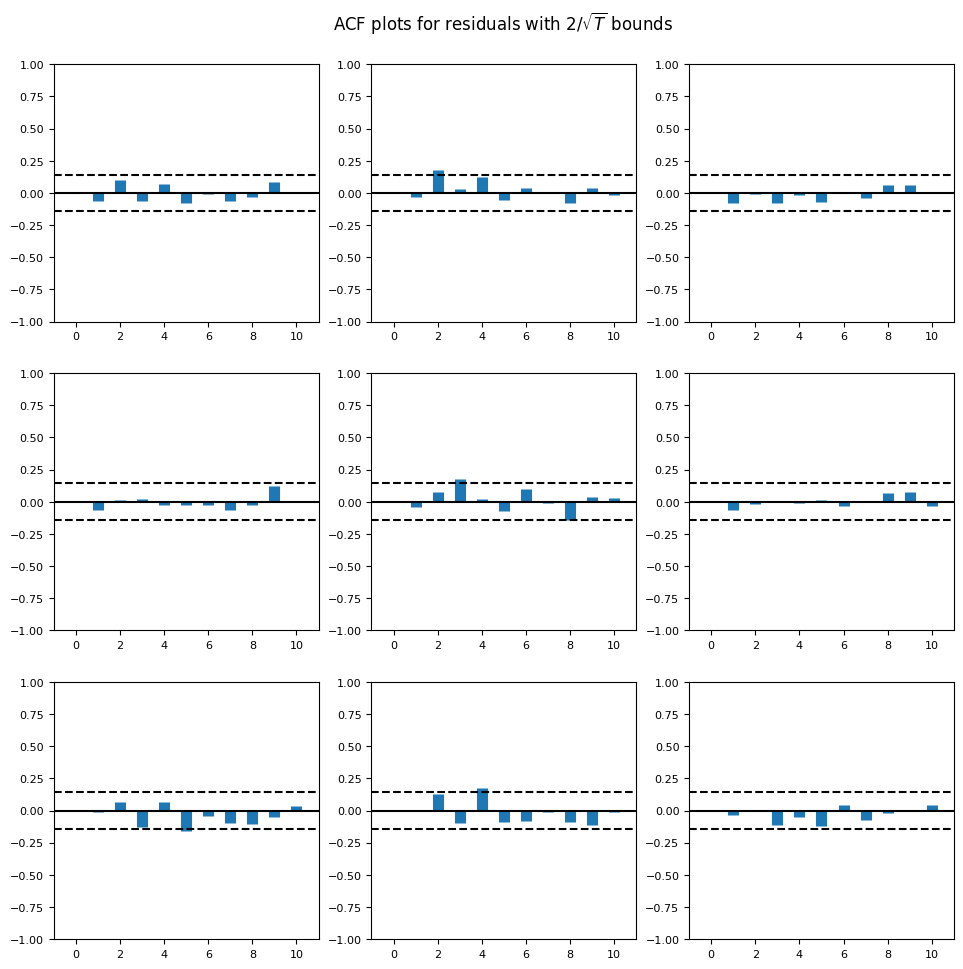

In [92]:
results.plot_acorr()

In [93]:
lag_order = results.k_ar
results.forecast(data.values[-lag_order:], steps=5)

array([[0.00807494, 0.00871296, 0.00946954],
       [0.00804547, 0.00859197, 0.00970303],
       [0.00798359, 0.0085699 , 0.00929724],
       [0.00796638, 0.00855539, 0.00922561],
       [0.00795805, 0.00855054, 0.00918033]])

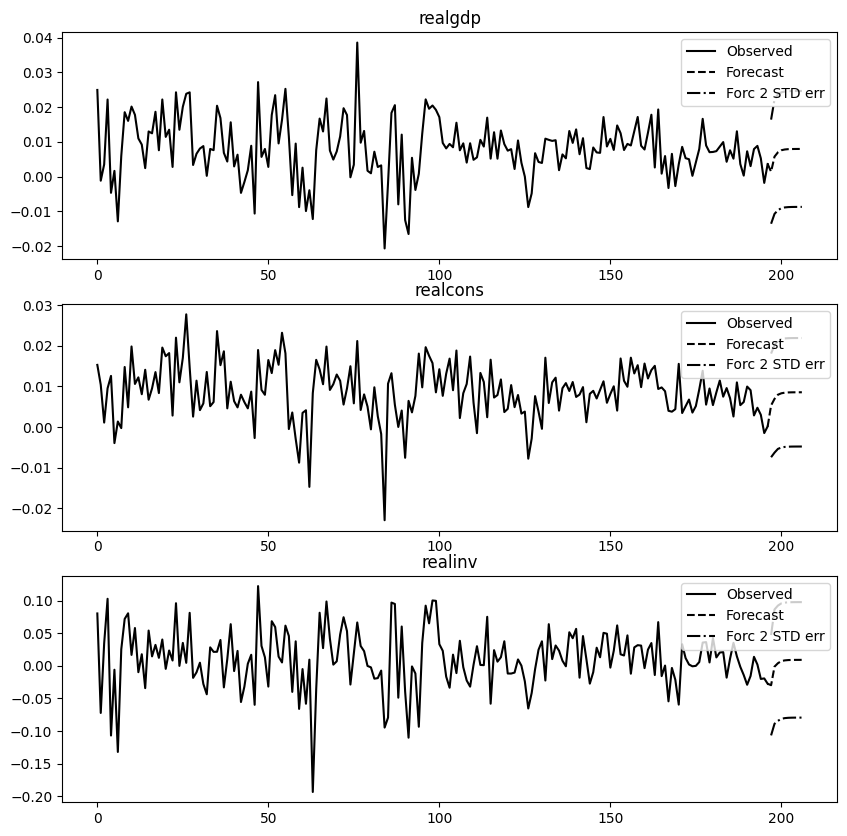

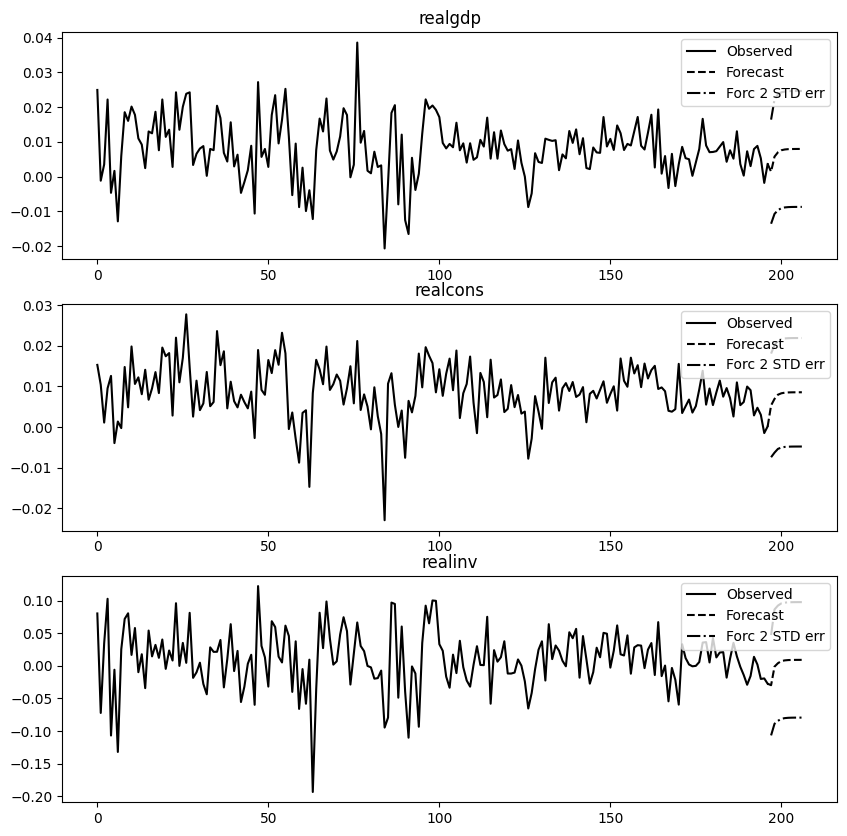

In [94]:
results.plot_forecast(10)

In [95]:
# 충격반응함수(Inpulse Response Function, IRF)
irf = results.irf(10)

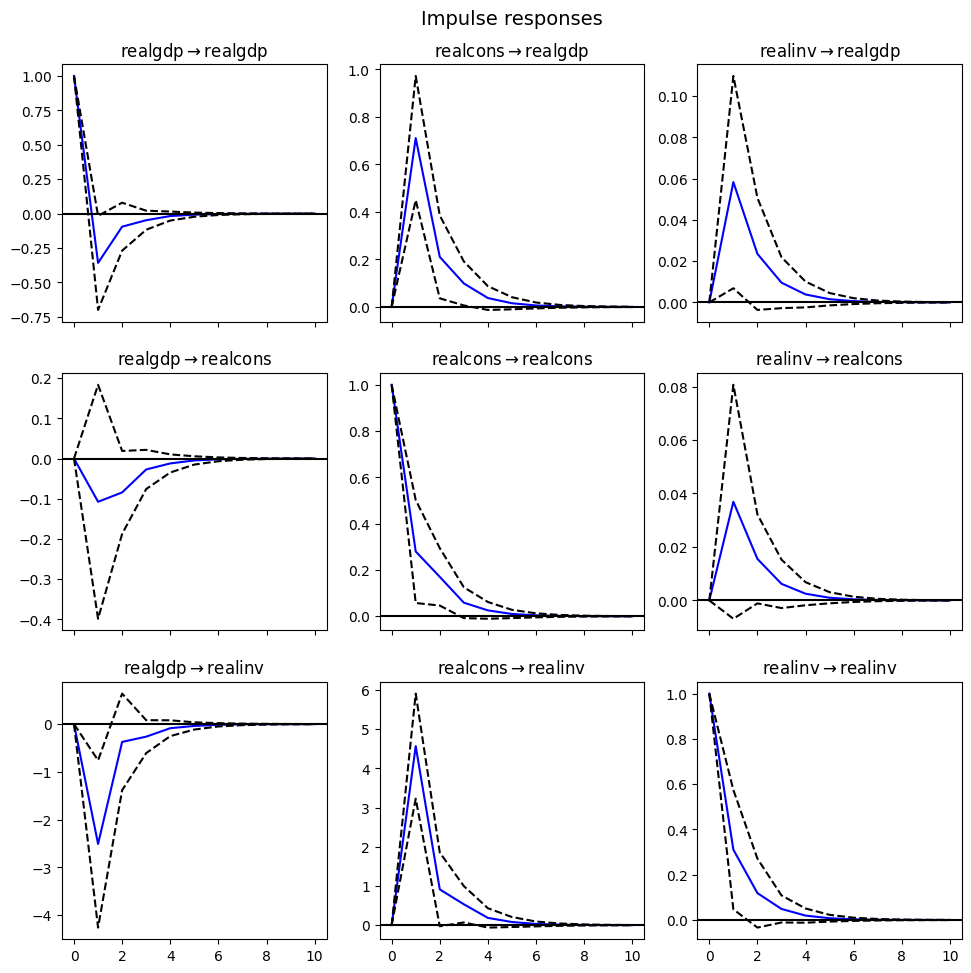

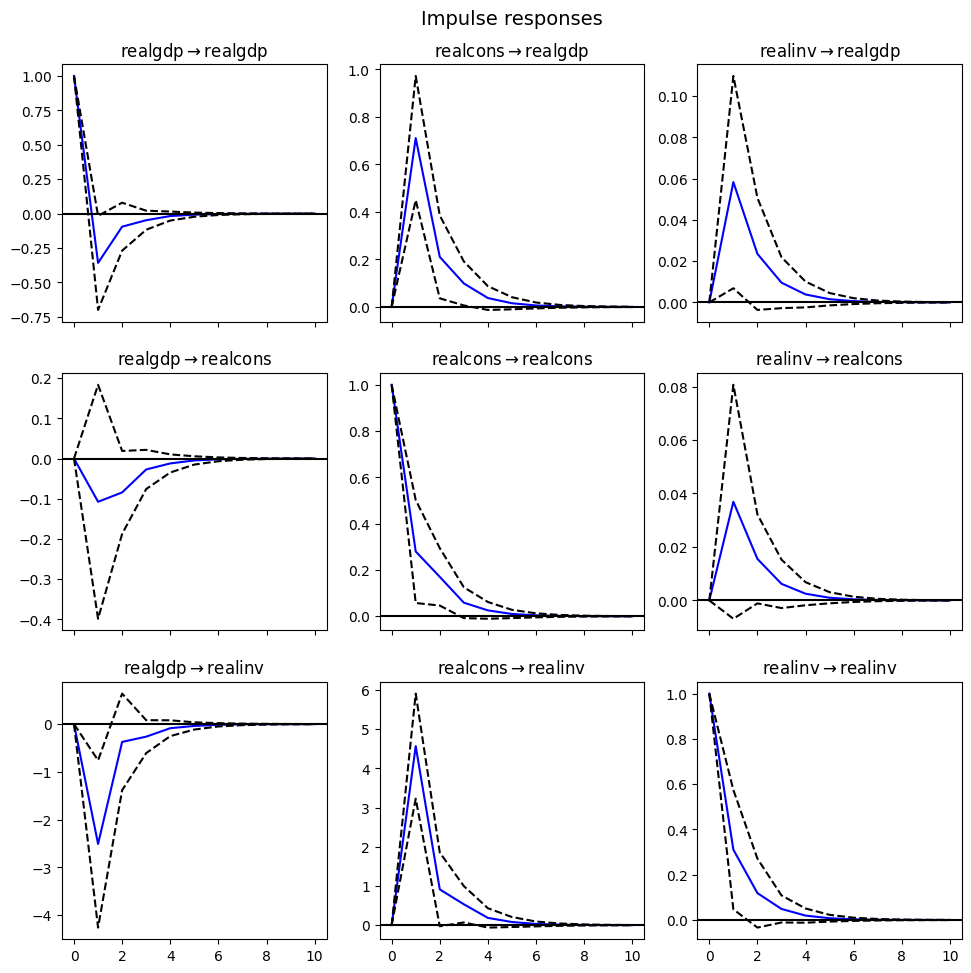

In [96]:
irf.plot(orth=False)

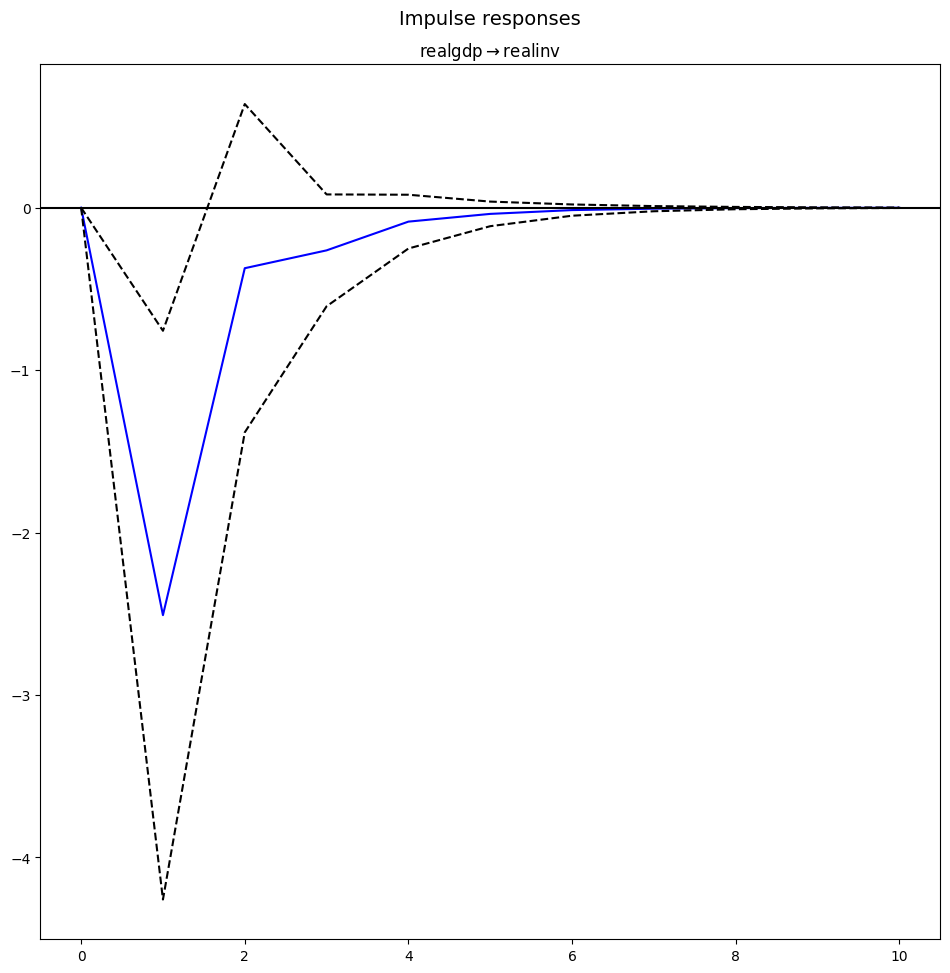

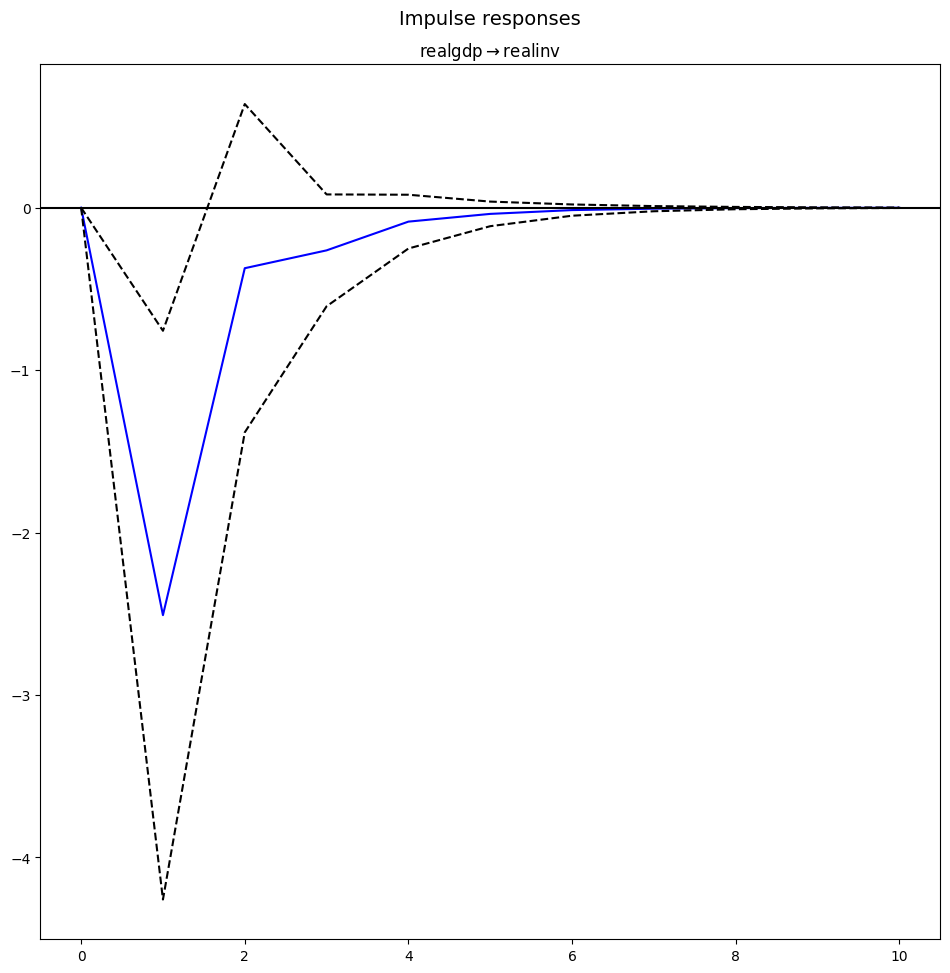

In [97]:
irf.plot(impulse='realgdp', response='realinv')